In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
class HopfieldNetwork:
    def __init__(self, num_units):
        self.num_units = num_units
        self.weights = np.zeros((num_units, num_units))

    def train(self, patterns):
        for p in patterns:
            p = p.reshape(self.num_units, 1)
            self.weights += np.dot(p, p.T)
        np.fill_diagonal(self.weights, 0)

    def predict(self, pattern, max_iterations=100):
        pattern = pattern.reshape(self.num_units, 1)
        for _ in range(max_iterations):
            prev_pattern = np.copy(pattern)
            pattern = np.sign(np.dot(self.weights, pattern))
            pattern[pattern == 0] = -1  # Handle 0 as -1
            if np.array_equal(prev_pattern, pattern):
                break
        return pattern.flatten()

In [72]:
# Convertir las matrices en vectores aplanados y cambiar 0 a -1
def convert_to_hopfield_format(matrix):
    vector = matrix.flatten()
    vector[vector == 0] = -1
    return vector

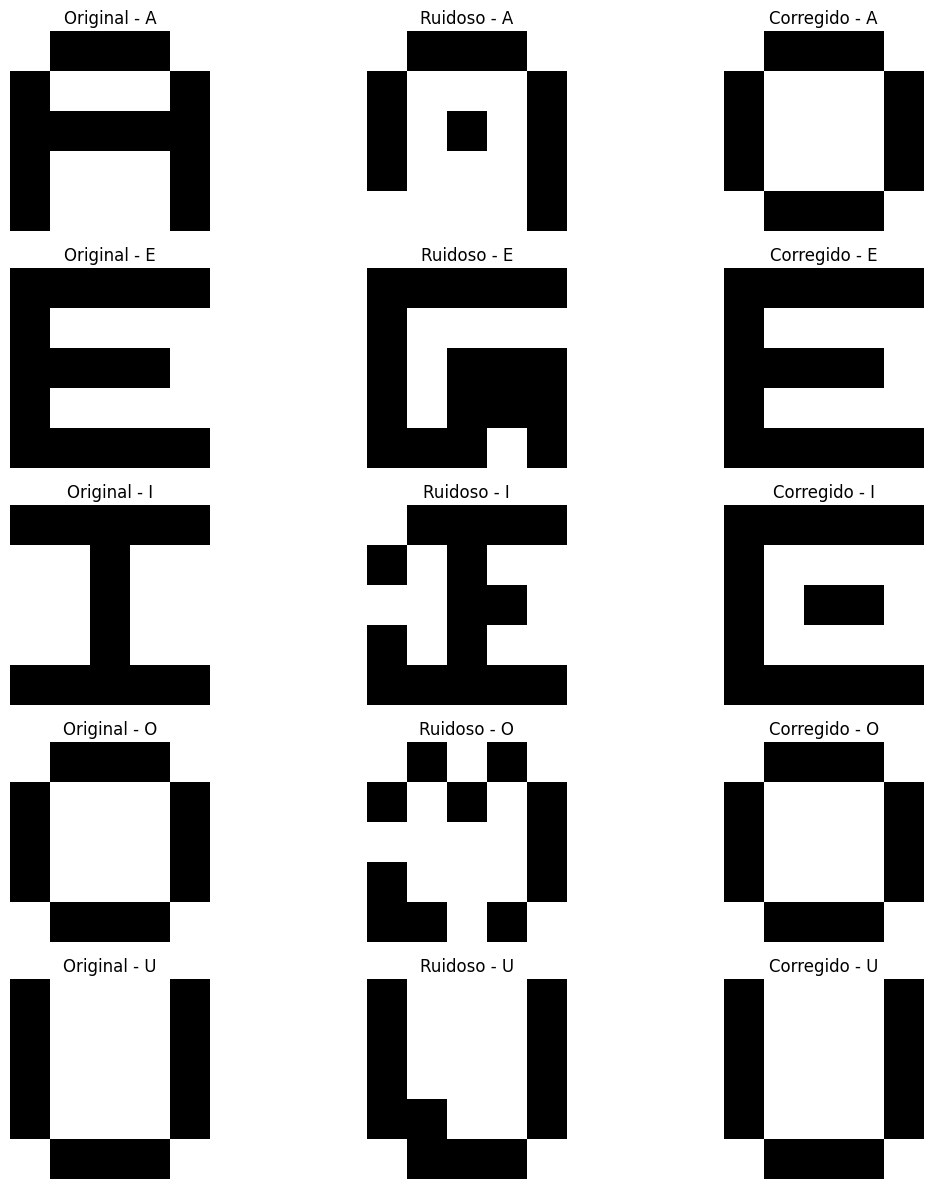

In [73]:

# Leer las vocales y las matrices con ruido desde archivos CSV
vowels_normal = pd.read_csv('vocales.csv', header=None)
vowels_noisy = pd.read_csv('vocales_con_ruido.csv', header=None)

# Convertir las vocales normales y ruidosas a matrices NumPy
vowels_normal_matrices = vowels_normal.apply(lambda row: np.array(row[1:]).astype(int).reshape(5, 5), axis=1).values
vowels_noisy_matrices = vowels_noisy.apply(lambda row: np.array(row[1:]).astype(int).reshape(5, 5), axis=1).values

# Aplicar la función de conversión a los patrones normales
binary_patterns = [convert_to_hopfield_format(matrix) for matrix in vowels_normal_matrices]

# Inicializar la red de Hopfield
num_units = 25  # Tamaño de la matriz 5x5 aplanada
hopfield_net = HopfieldNetwork(num_units)

# Entrenar la red de Hopfield con las vocales normales
hopfield_net.train(binary_patterns)

# Probar con las vocales ruidosas y obtener los patrones corregidos
corrected_patterns = []
for noisy_matrix in vowels_noisy_matrices:
    noisy_vector = convert_to_hopfield_format(noisy_matrix)
    corrected_pattern = hopfield_net.predict(noisy_vector)
    corrected_matrix = corrected_pattern.reshape(5, 5)
    corrected_matrix[corrected_matrix == -1] = 0
    corrected_patterns.append(corrected_matrix)

# Mostrar los resultados con imshow
fig, axs = plt.subplots(len(vowels_normal_matrices), 3, figsize=(12, 12))

for i, (vowel, normal_matrix, noisy_matrix, corrected_matrix) in enumerate(zip(vowels_normal[0], vowels_normal_matrices, vowels_noisy_matrices, corrected_patterns)):
    axs[i, 0].imshow(normal_matrix, cmap='binary')
    axs[i, 0].set_title(f'Original - {vowel}')
    axs[i, 0].axis('off')

    axs[i, 1].imshow(noisy_matrix, cmap='binary')
    axs[i, 1].set_title(f'Ruidoso - {vowel}')
    axs[i, 1].axis('off')

    axs[i, 2].imshow(corrected_matrix, cmap='binary')
    axs[i, 2].set_title(f'Corregido - {vowel}')
    axs[i, 2].axis('off')

plt.tight_layout()
plt.show()


In [57]:
import numpy as np

class HopfieldNetwork:
    def __init__(self, num_units):
        self.num_units = num_units
        self.weights = np.zeros((num_units, num_units))

    def train(self, patterns):
        for p in patterns:
            p = p.reshape(self.num_units, 1)
            self.weights += np.dot(p, p.T)
        np.fill_diagonal(self.weights, 0)

    def predict(self, pattern, max_iterations=100):
        pattern = pattern.reshape(self.num_units, 1)
        for _ in range(max_iterations):
            prev_pattern = np.copy(pattern)
            pattern = np.sign(np.dot(self.weights, pattern))
            pattern[pattern == 0] = 1  # Handle 0 as 1
            if np.array_equal(prev_pattern, pattern):
                break
        return pattern.flatten()

# Definir las vocales como matrices binarias
A = np.array([
    [0, 1, 1, 1, 0],
    [1, 0, 0, 0, 1],
    [1, 1, 1, 1, 1],
    [1, 0, 0, 0, 1],
    [1, 0, 0, 0, 1]
])

E = np.array([
    [1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0],
    [1, 1, 1, 1, 0],
    [1, 0, 0, 0, 0],
    [1, 1, 1, 1, 1]
])

I = np.array([
    [0, 1, 1, 1, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 1, 1, 1, 0]
])

O = np.array([
    [0, 1, 1, 1, 0],
    [1, 0, 0, 0, 1],
    [1, 0, 0, 0, 1],
    [1, 0, 0, 0, 1],
    [0, 1, 1, 1, 0]
])

U = np.array([
    [1, 0, 0, 0, 1],
    [1, 0, 0, 0, 1],
    [1, 0, 0, 0, 1],
    [1, 1, 1, 1, 1],
    [0, 1, 1, 1, 0]
])

# Convertir las matrices en vectores aplanados y cambiar 0 a -1
def convert_to_hopfield_format(matrix):
    vector = matrix.flatten()
    vector[vector == 0] = -1
    return vector

A_vector = convert_to_hopfield_format(A)
E_vector = convert_to_hopfield_format(E)
I_vector = convert_to_hopfield_format(I)
O_vector = convert_to_hopfield_format(O)
U_vector = convert_to_hopfield_format(U)

# Inicializar la red de Hopfield
num_units = A_vector.shape[0]
hopfield_net = HopfieldNetwork(num_units)

# Entrenar la red con los patrones de las vocales
patterns = [A_vector, E_vector, I_vector, O_vector, U_vector]
hopfield_net.train(patterns)

# Probar con un patrón ruidoso (algunos bits cambiados en la vocal 'A')
noisy_A = np.array([
    [0, 1, 1, 1, 0],
    [1, 0, 0, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 0, 0, 0, 1],
    [1, 0, 0, 0, 1]
]).flatten()
noisy_A[noisy_A == 0] = -1

# Obtener el patrón corregido
corrected_pattern = hopfield_net.predict(noisy_A)

# Convertir el patrón corregido a una matriz para imprimir
corrected_A = corrected_pattern.reshape(5, 5)
corrected_A[corrected_A == -1] = 0

print("Patrón original:\n", A)
print("Patrón ruidoso:\n", noisy_A.reshape(5, 5))
print("Patrón corregido:\n", corrected_A)

Patrón original:
 [[0 1 1 1 0]
 [1 0 0 0 1]
 [1 1 1 1 1]
 [1 0 0 0 1]
 [1 0 0 0 1]]
Patrón ruidoso:
 [[-1  1  1  1 -1]
 [ 1 -1 -1  1  1]
 [ 1  1  1  1  1]
 [ 1 -1 -1 -1  1]
 [ 1 -1 -1 -1  1]]
Patrón corregido:
 [[0. 1. 1. 1. 0.]
 [1. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]]
